<a href="https://colab.research.google.com/github/rubuntu/Taller_Introduccion_a_Ciencia_de_Datos_IA_e_Ingenieria_de_Datos/blob/main/sesion_14_introduccion_a_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑‍💻 Sesión 14 – Introducción a Transformers y BERT

## Objetivos:

- Entender la arquitectura Transformer (atención, capas, encoder-decoder).
- Explorar BERT y RoBERTa como modelos de lenguaje preentrenados.
- Realizar inferencia con BERT preentrenado.

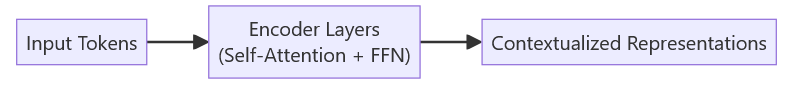


---

# Arquitectura Transformer

## 1. Motivación

Antes de los Transformers (Vaswani et al., 2017) https://arxiv.org/abs/1706.03762 , se usaban RNNs o LSTMs, que procesaban las secuencias paso a paso. Esto hacía difícil paralelizar y mantener dependencias largas.
El Transformer resolvió esto con el **mecanismo de atención**, que permite acceder directamente a toda la secuencia de entrada.

---

## 2. Estructura general del Transformer

Un Transformer típico se compone de dos bloques principales:

* **Encoder**: procesa la entrada y genera representaciones internas.
* **Decoder**: utiliza esas representaciones para producir una salida (ejemplo clásico: traducción).

Dependiendo del modelo:

* **Sólo encoder** → BERT (tareas de comprensión).
* **Sólo decoder** → GPT (tareas de generación).
* **Encoder-Decoder** → Traducción automática (el caso original).

---

## 3. Componentes clave

### a) Atención (Self-Attention)

La atención es la idea central.
Cada token (palabra/pieza de texto) se representa como un vector.
El mecanismo de atención permite que un token "mire" a todos los demás tokens y calcule **qué tan relevante es cada uno** para sí mismo.

Se usan tres matrices:

* **Q (Query)**: qué busca el token.
* **K (Key)**: qué ofrece cada token.
* **V (Value)**: la información del token.

La fórmula básica es:

$$
\text{Atención}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Donde:

* $QK^T$ mide la similitud entre tokens,
* se escala por $\sqrt{d_k}$,
* softmax da pesos de atención (función matemática que toma un vector de números reales y lo transforma en un vector de probabilidades - valores entre 0 y 1 que suman 1 ),
* y luego esos pesos ponderan los valores $V$.

👉 Esto permite que cada palabra tenga en cuenta el contexto completo.

#### Multi-Head Attention

En vez de una sola atención, se calculan varias en paralelo (“cabezas”) para capturar diferentes relaciones.

---

### b) Capas del Encoder

Cada capa del encoder tiene:

1. **Multi-Head Self-Attention**: cada token atiende a todos los de la entrada.
2. **Normalización y residuals**: estabilizan el entrenamiento.
3. **Feed-Forward Network (FFN)**: una red neuronal simple por token (no depende de otros tokens).
4. **Positional Encoding**: como el modelo no procesa en orden secuencial, se agregan vectores sinusoidales o aprendidos para dar noción de posición.

El encoder apila varias de estas capas.

---

### c) Capas del Decoder

El decoder también tiene varias capas, pero con algunas diferencias:

1. **Masked Self-Attention**: el token sólo puede atender a los anteriores (para no ver el futuro en generación).
2. **Encoder-Decoder Attention**: el decoder atiende a las salidas del encoder, conectando entrada con salida.
3. **FFN + Normalización**: igual que en el encoder.

---

## 4. Esquema general del flujo

1. Entrada (tokens) → Embeddings + Positional Encoding.
2. Pasa por las capas del **encoder** → genera representaciones contextuales.
3. El **decoder** toma estas representaciones y, paso a paso, genera la salida.

---

## 5. Ventajas principales

* Paralelización total (a diferencia de RNNs).
* Captura dependencias largas.
* Flexible (encoder, decoder o ambos).
* Escalable: más capas y parámetros → más capacidad.

---

📌 Ejemplo visual simplificado:

```
Input → [Encoder Layers] → Context vectors → [Decoder Layers] → Output
```

Cada capa = Atención + FFN + Normalización.





---

# 🔹 BERT (Bidirectional Encoder Representations from Transformers)

👉 **Sólo usa la parte *encoder*** del Transformer.
Está diseñado para **entender** texto.

### Características principales:

* **Entrenamiento**:

  1. **Masked Language Modeling (MLM)** → se enmascaran palabras y el modelo las predice usando contexto a izquierda y derecha.
     Ej: "El \[MASK] ladra" → predice "perro".
  2. **Next Sentence Prediction (NSP)** → predice si una frase sigue a otra.
* **Bidireccional** → cada token atiende a todos los demás, en ambas direcciones.
* **Uso**: clasificación de texto, análisis de sentimientos, búsqueda, embeddings semánticos, Q\&A.

### Flujo:

1. Input tokens → Encoder.
2. Encoder produce **representaciones contextualizadas**.
3. Se usan en la tarea final.

➡️ BERT = **lector** (entiende texto).

---

# 🔹 GPT (Generative Pre-trained Transformer)

👉 **Sólo usa la parte *decoder*** del Transformer.
Está diseñado para **generar texto autoregresivamente**.

### Características principales:

* **Entrenamiento**: predice la **siguiente palabra** dado el contexto previo (*Language Modeling*).
* **Máscara causal**: un token solo puede atender a los anteriores (no mira el futuro).
* **Uso**: generación de texto, chatbots, código, escritura creativa, etc.

### Flujo:

1. Input tokens → Decoder.
2. Decoder predice la próxima palabra.
3. La salida se añade al input y se repite.

➡️ GPT = **escritor** (genera texto).

---

# 🆚 Comparación rápida

| Aspecto               | **BERT**                  | **GPT**                      |
| --------------------- | ------------------------- | ---------------------------- |
| Parte del Transformer | Encoder                   | Decoder                      |
| Dirección             | Bidireccional             | Unidireccional (izq → der)   |
| Entrenamiento         | MLM + NSP                 | Predicción autoregresiva     |
| Uso principal         | Comprensión de texto      | Generación de texto          |
| Ejemplos              | BERT, RoBERTa, DistilBERT | GPT-1, GPT-2, GPT-3, ChatGPT |

---

📌 Resumen intuitivo:

* **BERT** apareció en 2018 (Google) y revolucionó la **comprensión** de texto.
* **GPT-1** también en 2018 (OpenAI) pero con foco en **generación** de texto.

---




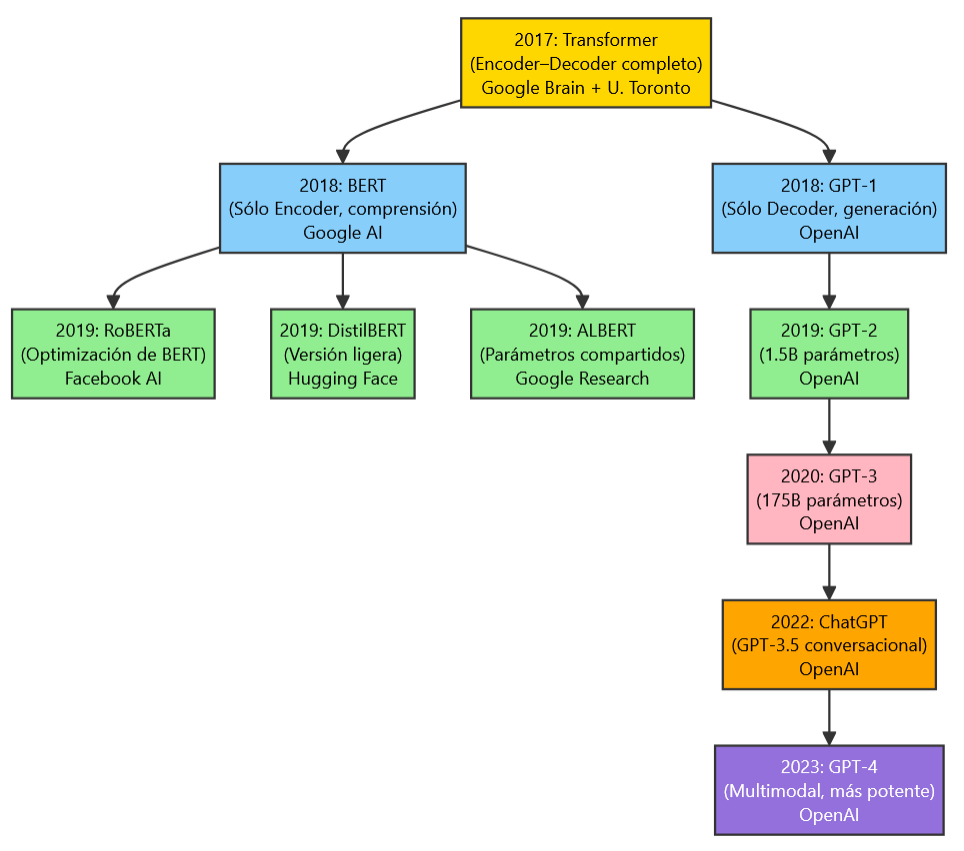

## Hands-on checklist:

1. Explicar con visualización cómo funciona la atención (usar un ejemplo toy).
2. Cargar modelo BERT base desde HuggingFace (bert-base-uncased).
3. Tokenizar texto con AutoTokenizer.
4. Generar embeddings de frases y palabras.
5. Visualizar embeddings con PCA/TSNE para comparar semántica.
6. Usar embeddings de BERT como features para un clasificador sencillo.

In [ ]:
# ==========================================
# SESIÓN 14: Transformers y BERT
# ==========================================

#!pip install transformers datasets torch -q

from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

---

## 1. Cargar modelo y tokenizer

In [ ]:
# Usaremos BERT base uncased (versión pequeña)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

---

## 2. Tokenización de ejemplos

In [ ]:
# Ejemplo de frases
sentences = [
    "I love banking and data science.",
    "The customer service was terrible.",
    "Artificial Intelligence will transform finance.",
    "I hate hidden fees in my bank account."
]

# Tokenizamos
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

print("Tokens:", inputs["input_ids"].shape)
print("Ejemplo de tokens:", inputs["input_ids"][0][:10])
print("Tokens decodificados:", tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][:10]))

---

## 3. Generar embeddings con BERT

In [ ]:
# Pasamos por el modelo
with torch.no_grad():
    outputs = model(**inputs)

# outputs.last_hidden_state: [batch, seq_len, hidden_dim]
# outputs.pooler_output: [batch, hidden_dim] → embedding de la frase
sentence_embeddings = outputs.pooler_output

print("Shape de embeddings:", sentence_embeddings.shape)

---

## 4. Visualizar embeddings en 2D

In [ ]:
# Reducimos dimensionalidad con PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(sentence_embeddings.numpy())

# Graficamos
plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1])

for i, txt in enumerate(sentences):
    plt.annotate(txt, (reduced[i,0]+0.01, reduced[i,1]+0.01))

plt.title("Embeddings de frases con BERT")
plt.show()

---

## 5. Comparar embeddings palabra a palabra

In [ ]:
# Ejemplo con una sola frase
example = "The bank charges hidden fees."
tokens = tokenizer(example, return_tensors="pt")

with torch.no_grad():
    outputs = model(**tokens)

word_embeddings = outputs.last_hidden_state.squeeze(0)

print("Shape:", word_embeddings.shape)  # (seq_len, hidden_dim)

# Mostrar los tokens y primeras 5 dimensiones del embedding
for token_id, emb in zip(tokens["input_ids"][0], word_embeddings):
    token = tokenizer.decode([token_id.item()])
    print(f"{token:15s} -> {emb[:5].numpy()}")


---

## 6. Preguntas de discusión

### 1. ¿Notas cómo **tokens similares** (ej: "bank", "finance") aparecen cerca en el espacio de embeddings?

* En los modelos de lenguaje modernos, cada palabra/token se representa como un **vector en un espacio de alta dimensión**.
* Durante el entrenamiento, el modelo aprende que palabras relacionadas semánticamente (ej. *bank*, *finance*, *money*) deben ubicarse cercanas.
* Esto permite que el modelo capture **relaciones de significado y analogías**:

  * *king – man + woman ≈ queen*.
  * *Paris – France + Italy ≈ Rome*.
* Visualizar embeddings con PCA o t-SNE muestra **clusters semánticos** (colores agrupados por temas).

---

### 2. ¿Cómo cambia esto respecto a un **Bag-of-Words**, donde “bank” = vector one-hot sin semántica?

* En **Bag-of-Words (BoW)** o **one-hot encoding**, cada palabra es un vector **discreto y ortogonal** (solo 0s y un 1).
* No existe noción de similitud: *bank* y *finance* son vectores completamente distintos.
* Esto produce:

  * Alta dimensionalidad (un vector por palabra del vocabulario).
  * Escasa generalización (si aparece una palabra nueva, no tiene relación con ninguna otra).
* En cambio, con **word embeddings densos** (Word2Vec, GloVe, BERT, GPT), palabras similares comparten proximidad → el modelo **generaliza mejor**.

---

### 3. ¿Qué ventajas aporta la autoatención frente a secuencias RNN/LSTM?

* **Acceso directo a todo el contexto**: cada token puede "atender" a cualquier otro sin necesidad de procesar la secuencia paso a paso.
* **Paralelización**: la atención procesa todos los tokens a la vez, mientras que RNN/LSTM son inherentemente secuenciales.
* **Dependencias largas**: en RNNs, el gradiente se desvanece o explota en secuencias largas → la autoatención mantiene conexiones de largo alcance sin dificultad.
* **Flexibilidad**: las *heads* de multi-head attention pueden aprender diferentes tipos de relaciones (sintaxis, semántica, etc.).

👉 Ejemplo: en la frase
*"The bank near the river is closed"*
la atención puede ayudar a que "bank" se relacione más con "river" en ese contexto, y no con "finance".

---

### 4. ¿Por qué es mejor usar embeddings **contextuales**?

* En modelos antiguos (Word2Vec, GloVe), cada palabra tenía **un solo vector fijo**.

  * *bank* → mismo vector, ya sea "banco de dinero" o "orilla del río".
* En embeddings contextuales (BERT, GPT), el vector **depende del contexto**.

  * *bank* en *"the river bank"* ≠ *bank* en *"the finance bank"*.
* Esto resuelve la **polisemia** y mejora el entendimiento semántico.
* Además, las representaciones contextuales son más útiles en tareas como Q\&A, clasificación, resumen, etc.

---

✅ Resumen:

* Los **embeddings densos y contextuales** hacen que las palabras "se parezcan" en función de su significado y contexto.
* La **autoatención** es clave porque permite mirar todo el contexto en paralelo, algo que RNN/LSTM no hacen bien.
* Pasamos de un mundo de vectores rígidos (*one-hot*) a representaciones ricas, dinámicas y con semántica.

---




